In [1]:
# Checking the version of PYTHON; we only support 3 at the moment
import sys
if sys.version_info < (3,0):
    raise Exception("Please use Python version 3 or greater.")
    
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import linalg as la

import sys
sys.path.append("../../")
# importing the QISKit
from qiskit import QuantumCircuit, QuantumProgram
import Qconfig

In [2]:
# import tomography libary
import tools.qcvv.tomography as tomo

# useful additional packages 
from tools.visualization import plot_state, plot_histogram
from tools.qi.qi import state_fidelity, concurrence, purity

### Bell States on the ibmqx2

In [3]:
qp = QuantumProgram()
qp.set_api(Qconfig.APItoken, Qconfig.config["url"], verify=False) # set the APIToken and API url

-- Ignoring SSL errors.  This is not recommended --


In [4]:
qp.available_backends()

['ibmqx2',
 'ibmqx3',
 'ibmqx_qasm_simulator',
 'local_qasm_simulator',
 'local_unitary_simulator']

In [5]:
conf = qp.get_backend_configuration("ibmqx2", list_format=True)

In [6]:
backend = conf['name']
shots = 1000
max_credits = 5
n = conf['n_qubits']

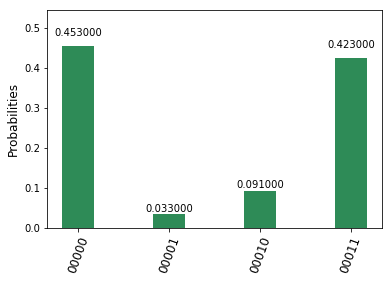

In [7]:
#Setup the experiment run one circuit 

q = qp.create_quantum_register("q", n)
c = qp.create_classical_register("c", n)
bell = qp.create_circuit("bell", [q], [c])
bell.h(q[0])
bell.cx(q[0], q[1])
bell.measure(q[0], c[0])
bell.measure(q[1], c[1])

circuits = ["bell"]
result = qp.execute(circuits, backend, shots=shots, max_credits=max_credits, wait=10, timeout=240)
plot_histogram(result.get_counts("bell"))


>> created state tomography circuits for "bell_tomo"
Timed out, trying again
fid = 0.87720081012


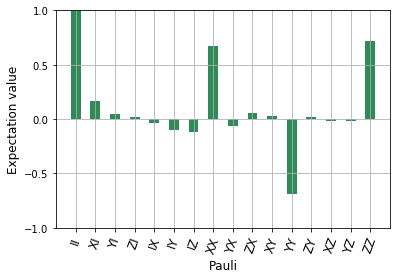

In [8]:
# run tomograph 
bell_tomo = qp.create_circuit("bell_tomo", [q], [c])
bell_tomo.h(q[0])
bell_tomo.cx(q[0], q[1])

meas_qubits= [0,1]
tomo_labels = tomo.build_state_tomography_circuits(qp, "bell_tomo", meas_qubits, q, c)
out = qp.execute(tomo_labels, backend, shots=shots, max_credits=max_credits, wait=20, timeout=20)

if str(out.get_error()) == 'Time Out':
    print('Timed out, trying again')
    out = qp.execute(tomo_labels, backend, shots=shots, max_credits=max_credits, wait=40, timeout=400)
if str(out) !='ERROR':
    target = np.array([1., 0., 0.,1.]/np.sqrt(2.))
    bell_tomo_dat = tomo.state_tomography_data(out, 'bell_tomo', meas_qubits)
    rho_fit = tomo.fit_tomography_data(bell_tomo_dat, method='wizard')
    F_fit = state_fidelity(rho_fit, target)
    print("fid = " +  str(F_fit))
    plot_state(rho_fit,"paulivec")

>> created state tomography circuits for "bell_tomo"
fid = 0.889551993764


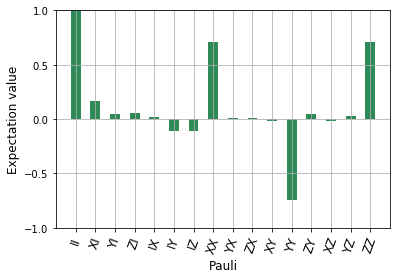

>> created state tomography circuits for "bell_tomo"
fid = 0.963895694741


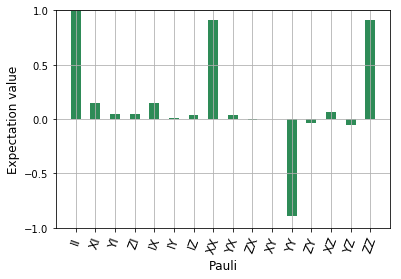

>> created state tomography circuits for "bell_tomo"
fid = 0.872612153222


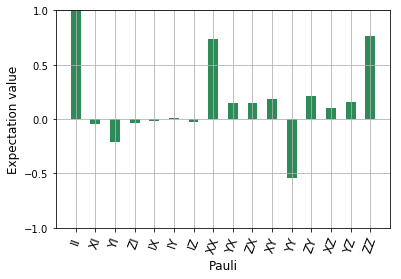

>> created state tomography circuits for "bell_tomo"
fid = 0.90144365261


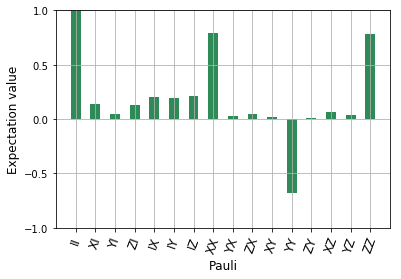

>> created state tomography circuits for "bell_tomo"
fid = 0.901760060161


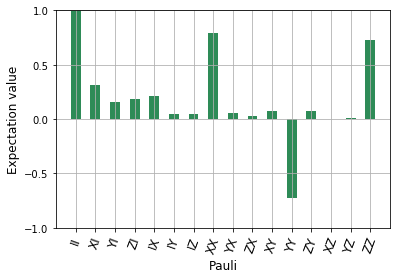

>> created state tomography circuits for "bell_tomo"
fid = 0.952566298276


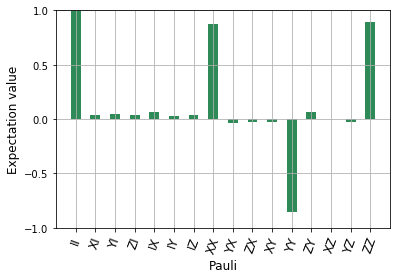

In [12]:
# run all gates 
for i in conf['coupling_map']:
    meas_qubits = i
    
    bell_tomo = qp.create_circuit("bell_tomo", [q], [c])
    bell_tomo.h(q[i[0]])
    bell_tomo.cx(q[i[0]], q[i[1]])

    tomo_labels = tomo.build_state_tomography_circuits(qp, "bell_tomo", meas_qubits, q, c)
    out = qp.execute(tomo_labels, backend, shots=shots, max_credits=max_credits, wait=20, timeout=400)

    if str(out.get_error()) == 'Time Out':
        print('Timed out, trying again')
        out = qp.execute(tomo_labels, backend, shots=shots, max_credits=max_credits, wait=40, timeout=400)
    if str(out) !='ERROR':
        target = np.array([1., 0., 0.,1.]/np.sqrt(2.))
        bell_tomo_dat = tomo.state_tomography_data(out, 'bell_tomo', meas_qubits)
        rho_fit = tomo.fit_tomography_data(bell_tomo_dat, method='wizard')
        F_fit = state_fidelity(rho_fit, target)
        print("fid = " +  str(F_fit))
        plot_state(rho_fit,"paulivec")

### Bell States on the ibmqx3

In [17]:
qp = QuantumProgram()
qp.set_api(Qconfig.APItoken, Qconfig.config["url"], verify=False) # set the APIToken and API url
conf = qp.get_backend_configuration("ibmqx3", list_format=True)
conf

-- Ignoring SSL errors.  This is not recommended --


{'basis_gates': 'u1,u2,u3,cx,id',
 'chip_name': 'Albatross',
 'coupling_map': [[0, 1],
  [1, 2],
  [2, 3],
  [3, 14],
  [4, 3],
  [4, 5],
  [6, 7],
  [6, 11],
  [7, 10],
  [8, 7],
  [9, 8],
  [9, 10],
  [11, 10],
  [12, 5],
  [12, 11],
  [12, 13],
  [13, 4],
  [13, 14],
  [15, 0],
  [15, 14]],
 'description': '16 transmon 2x8 ladder',
 'n_qubits': 16,
 'name': 'ibmqx3',
 'online_date': '2017-06-06T11:00:00.000Z',
 'simulator': False,
 'url': 'https://ibm.biz/qiskit-ibmqx3',
 'version': '1'}

In [18]:
backend = conf['name']
shots = 1000
max_credits = 5
n = conf['n_qubits']

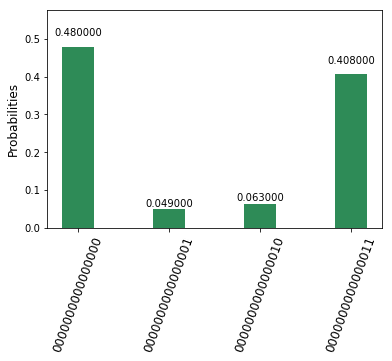

In [19]:
#Setup the experiment run one circuit 

q = qp.create_quantum_register("q", n)
c = qp.create_classical_register("c", n)
bell = qp.create_circuit("bell", [q], [c])
bell.h(q[0])
bell.cx(q[0], q[1])
bell.measure(q[0], c[0])
bell.measure(q[1], c[1])

circuits = ["bell"]
result = qp.execute(circuits, backend, shots=shots, max_credits=max_credits, wait=10, timeout=240)
plot_histogram(result.get_counts("bell"))

>> created state tomography circuits for "bell_tomo"
Timed out, trying again
fid = 0.903584051602


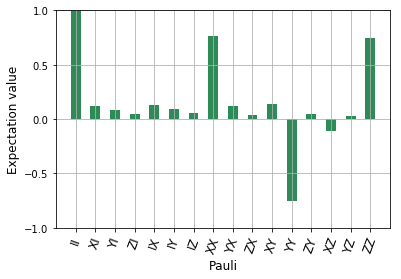

In [20]:
# run tomograph 
bell_tomo = qp.create_circuit("bell_tomo", [q], [c])
bell_tomo.h(q[0])
bell_tomo.cx(q[0], q[1])

meas_qubits= [0,1]
tomo_labels = tomo.build_state_tomography_circuits(qp, "bell_tomo", meas_qubits, q, c)
out = qp.execute(tomo_labels, backend, shots=shots, max_credits=max_credits, wait=20, timeout=20)

if str(out.get_error()) == 'Time Out':
    print('Timed out, trying again')
    out = qp.execute(tomo_labels, backend, shots=shots, max_credits=max_credits, wait=40, timeout=400)
if str(out) !='ERROR':
    target = np.array([1., 0., 0.,1.]/np.sqrt(2.))
    bell_tomo_dat = tomo.state_tomography_data(out, 'bell_tomo', meas_qubits)
    rho_fit = tomo.fit_tomography_data(bell_tomo_dat, method='wizard')
    F_fit = state_fidelity(rho_fit, target)
    print("fid = " +  str(F_fit))
    plot_state(rho_fit,"paulivec")

>> created state tomography circuits for "bell_tomo"
fid = 0.891318606708


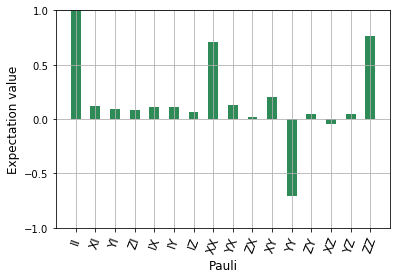

>> created state tomography circuits for "bell_tomo"
fid = 0.904899034515


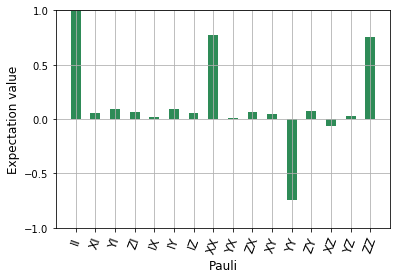

>> created state tomography circuits for "bell_tomo"
fid = 0.899300122917


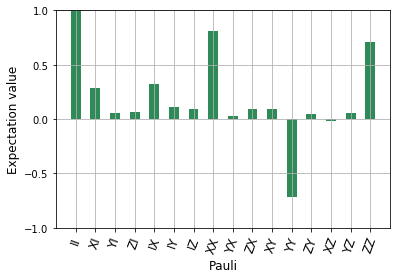

>> created state tomography circuits for "bell_tomo"
fid = 0.892926357125


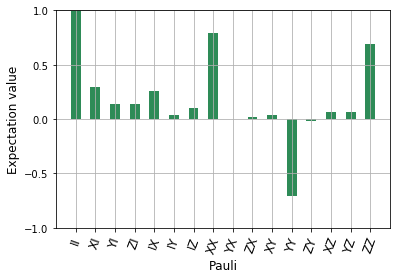

>> created state tomography circuits for "bell_tomo"
fid = 0.873658425682


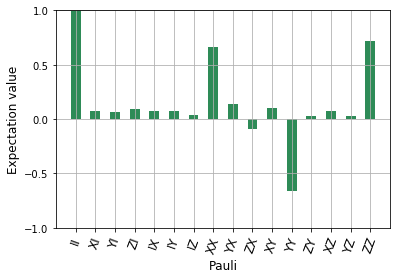

>> created state tomography circuits for "bell_tomo"
fid = 0.891026662717


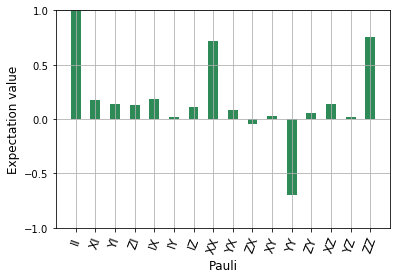

>> created state tomography circuits for "bell_tomo"
fid = 0.916778628054


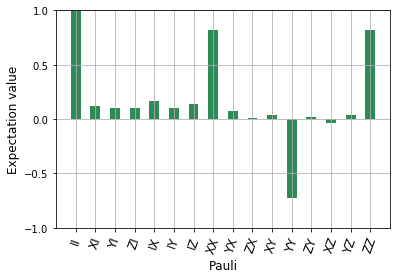

>> created state tomography circuits for "bell_tomo"
fid = 0.922656805034


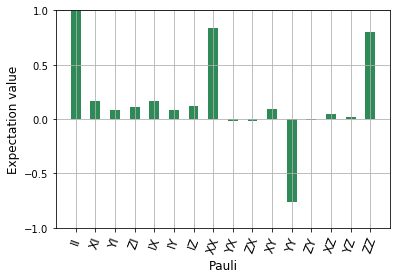

>> created state tomography circuits for "bell_tomo"
fid = 0.899898550169


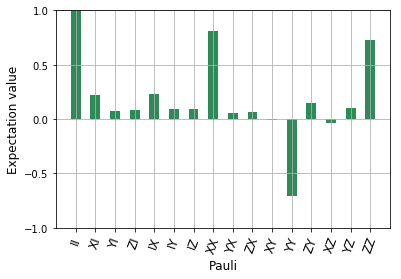

>> created state tomography circuits for "bell_tomo"
fid = 0.888813391743


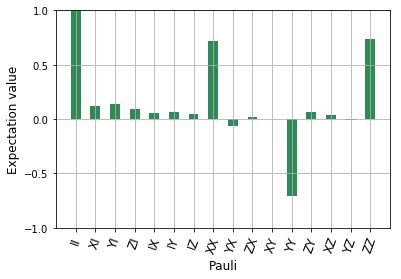

>> created state tomography circuits for "bell_tomo"
fid = 0.900799411441


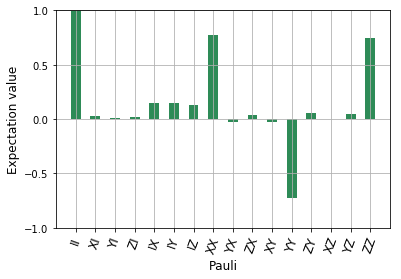

>> created state tomography circuits for "bell_tomo"
fid = 0.894293563998


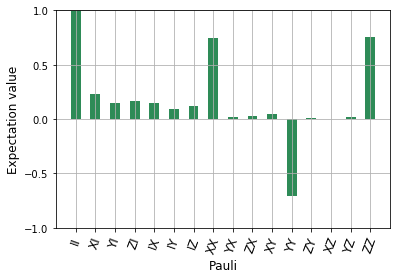

>> created state tomography circuits for "bell_tomo"
fid = 0.916620469828


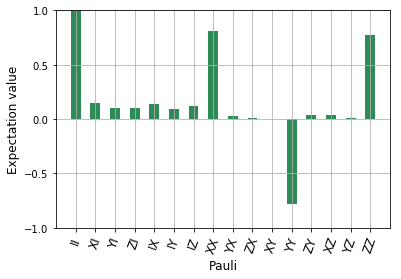

>> created state tomography circuits for "bell_tomo"
fid = 0.884625311059


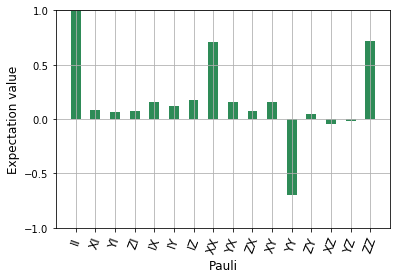

>> created state tomography circuits for "bell_tomo"
fid = 0.88536824533


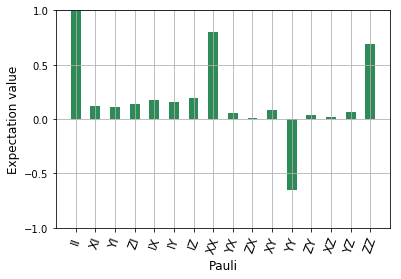

>> created state tomography circuits for "bell_tomo"
fid = 0.812396881617


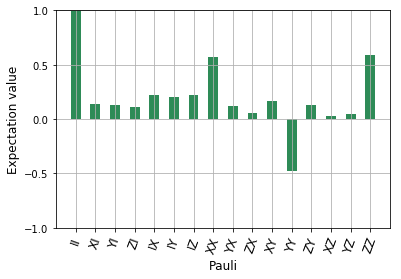

>> created state tomography circuits for "bell_tomo"
fid = 0.846089004187


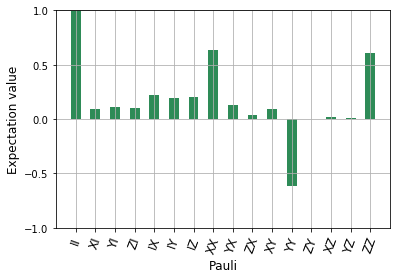

>> created state tomography circuits for "bell_tomo"
fid = 0.855212162177


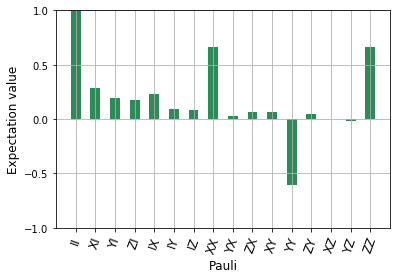

>> created state tomography circuits for "bell_tomo"
fid = 0.91216384825


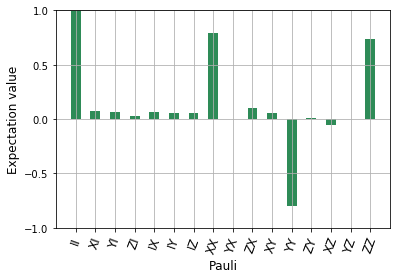

>> created state tomography circuits for "bell_tomo"
fid = 0.91864751174


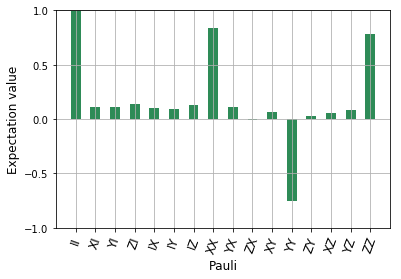

In [21]:
# run all gates 
for i in conf['coupling_map']:
    meas_qubits = i
    
    bell_tomo = qp.create_circuit("bell_tomo", [q], [c])
    bell_tomo.h(q[i[0]])
    bell_tomo.cx(q[i[0]], q[i[1]])

    tomo_labels = tomo.build_state_tomography_circuits(qp, "bell_tomo", meas_qubits, q, c)
    out = qp.execute(tomo_labels, backend, shots=shots, max_credits=max_credits, wait=20, timeout=400)

    if str(out.get_error()) == 'Time Out':
        print('Timed out, trying again')
        out = qp.execute(tomo_labels, backend, shots=shots, max_credits=max_credits, wait=40, timeout=400)
    if str(out) !='ERROR':
        target = np.array([1., 0., 0.,1.]/np.sqrt(2.))
        bell_tomo_dat = tomo.state_tomography_data(out, 'bell_tomo', meas_qubits)
        rho_fit = tomo.fit_tomography_data(bell_tomo_dat, method='wizard')
        F_fit = state_fidelity(rho_fit, target)
        print("fid = " +  str(F_fit))
        plot_state(rho_fit,"paulivec")